# Load necessary Python libraries

In [0]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
pip install tensorflow-gpu=2.0.0

In [0]:
pip install SimpleITK

     |████████████████████████████████| 42.5MB 99kB/s 


# Mount your Google Drive

In [0]:
from google.colab import drive
drive.mount('M_drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at M_drive


# Import necessary libraries to environment


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as itk
from os.path import join
from PIL import Image  
import PIL  

%matplotlib notebook
%matplotlib inline

import cv2
from sklearn.model_selection import train_test_split

# Check data in folders

In [0]:
path="M_drive/My Drive/SeminarAMS/"
DATA_PATH = path+'/real_images/shared/super-resolution/raw/'


folder_path = os.listdir(DATA_PATH)


folder=DATA_PATH+folder_path[0]

print(os.listdir(folder))
im3D_im=itk.ReadImage(join(folder,os.listdir(folder)[0]))
cor_im= itk.ReadImage(join(folder,os.listdir(folder)[1]))
tra_im= itk.ReadImage(join(folder,os.listdir(folder)[2]))
sag_im= itk.ReadImage(join(folder,os.listdir(folder)[3]))



cor= itk.GetArrayFromImage(cor_im)
sag= itk.GetArrayFromImage(sag_im)
tra= itk.GetArrayFromImage(tra_im)
im3D= itk.GetArrayFromImage(im3D_im)   

['t1_3d.nii.gz', 't1_2d_cor.nii.gz', 't1_2d_tra.nii.gz', 't1_2d_sag.nii.gz']


Check shapes of images

In [0]:
print(cor.shape)
print(sag.shape)
print(tra.shape)
print(im3D.shape)

(256, 256, 160)
(256, 256, 160)
(256, 256, 160)
(256, 256, 160)
(-78.04154205322266, -143.81292724609375, -137.2585906982422)
(-78.04154205322266, -143.81292724609375, -137.2585906982422)
(-78.04154205322266, -143.81292724609375, -137.2585906982422)
(0.9999961256980896, 1.0, 1.0)


'\nprint(cor_im)\nprint(sag_im)\nprint(tra_im)\nprint(im3D_im)'

Vizualize slices of 3D images

Text(0.5, 1.0, 'HR Y-os')

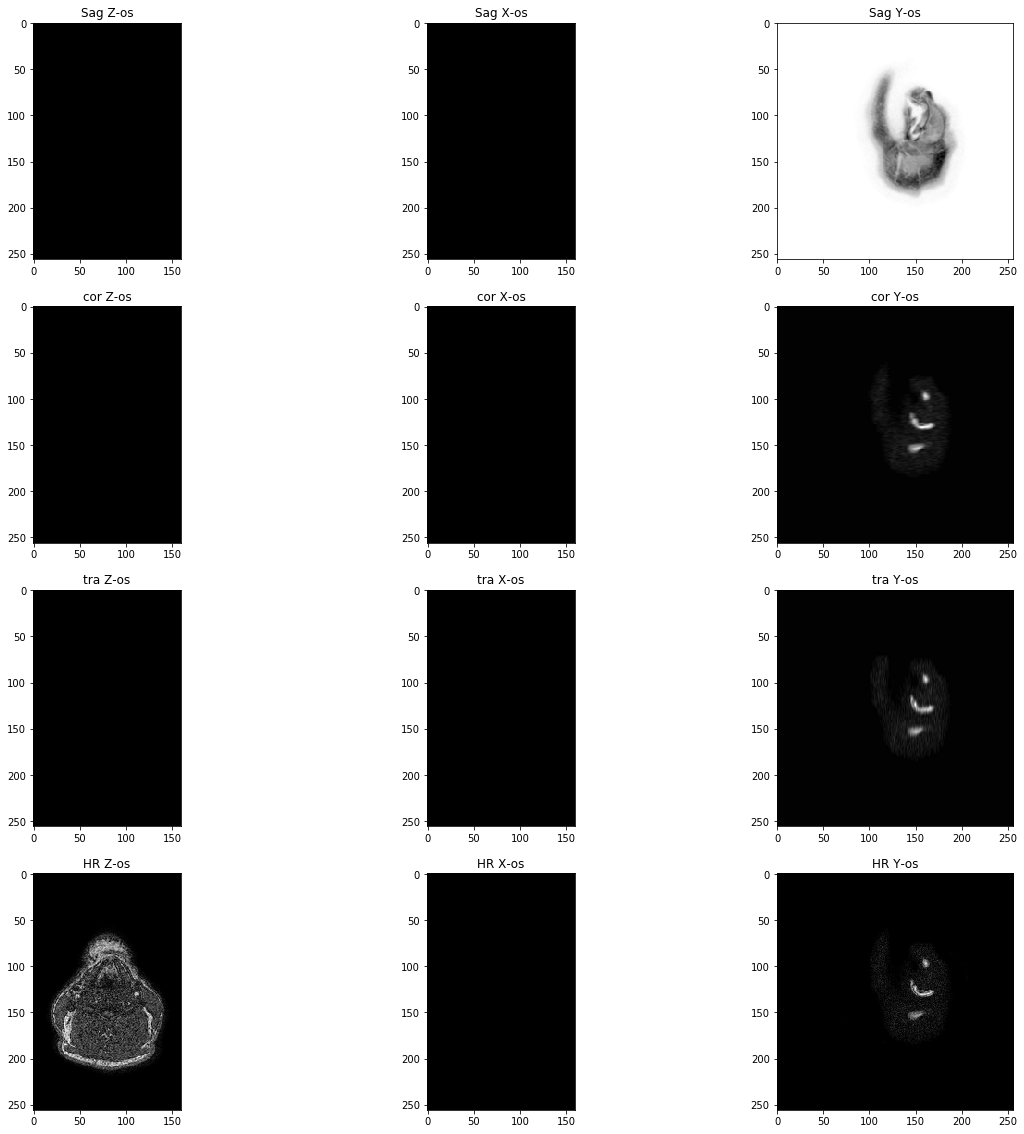

In [0]:
fig=plt.figure(figsize=(20, 20))
plt.subplot(431)
plt.imshow(sag[100,:,:],cmap="gray")
plt.title("Sag Z-os")

plt.subplot(432)
plt.imshow(sag[:,100,:],cmap="gray")
plt.title("Sag X-os")

plt.subplot(433)
plt.imshow(sag[:,:,100],cmap="gray")
plt.title("Sag Y-os")

plt.subplot(434)
plt.imshow(cor[100,:,:],cmap="gray")
plt.title("cor Z-os")

plt.subplot(435)
plt.imshow(cor[:,100,:],cmap="gray")
plt.title("cor X-os")

plt.subplot(436)
plt.imshow(cor[:,:,100],cmap="gray")
plt.title("cor Y-os")

plt.subplot(437)
plt.imshow(tra[100,:,:],cmap="gray")
plt.title("tra Z-os")

plt.subplot(438)
plt.imshow(tra[:,100,:],cmap="gray")
plt.title("tra X-os")

plt.subplot(439)
plt.imshow(tra[:,:,100],cmap="gray")
plt.title("tra Y-os")

plt.subplot(4,3,10)
plt.imshow(im3D[100,:,:],cmap="gray")
plt.title("HR Z-os")

plt.subplot(4,3,11)
plt.imshow(im3D[:,100,:],cmap="gray")
plt.title("HR X-os")

plt.subplot(4,3,12)
plt.imshow(im3D[:,:,100],cmap="gray")
plt.title("HR Y-os")


# Make HR-LR pairs from 3D images

In [0]:
path="M_drive/My Drive/SeminarAMS/"
DATA_PATH = path+'/real_images/shared/super-resolution/raw/'

save_dir_HR=path+"/dataset_MRI_real/HR/"
os.makedirs(save_dir_HR, exist_ok=True)

save_dir_LR_low=path+"/dataset_MRI_real/LR_low/"
os.makedirs(save_dir_LR_low, exist_ok=True)



# search all subfolders
patient_path = os.listdir(DATA_PATH)
save_id=0 #mark for saving

sizeHR=(252,252) #size of HR images
sizeLR=(84,84) #size of LR images

import time

for i in range(len(patient_path)):
    start_time = time.time()
    #load data from one folder
    image_path = join(DATA_PATH, patient_path[i])
    print(image_path)

    im3D_im=itk.GetArrayFromImage(itk.ReadImage(join(image_path,os.listdir(image_path)[0])))
    cor_im=itk.GetArrayFromImage(itk.ReadImage(join(image_path,os.listdir(image_path)[1])))
    tra_im=itk.GetArrayFromImage(itk.ReadImage(join(image_path,os.listdir(image_path)[2])))
    sag_im=itk.GetArrayFromImage(itk.ReadImage(join(image_path,os.listdir(image_path)[3])))

    Z,X,Y=im3D_im.shape

    for z in range(20,Z-20,20):
        #saving LR_low images along Z-axis
        im=sag_im[z,:,:]
        im=cv2.resize(im, dsize=sizeLR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_LR_low+str(save_id)+".png")


        #saving HR image along Z-axis
        im=im3D_im[z,:,:]
        im=cv2.resize(im, dsize=sizeHR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_HR+str(save_id)+".png")

        save_id+=1

    for x in range(20,X-20,20):
        #saving LR_low images along X-axis
        im=sag_im[:,x,:]
        im=cv2.resize(im, dsize=sizeLR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_LR_low+str(save_id)+".png")

        #saving HR image along X-axis
        im=im3D_im[:,x,:]
        im=cv2.resize(im, dsize=sizeHR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_HR+str(save_id)+".png")

        save_id+=1
        
    for y in range(20,Y-20,20):
        #saving LR_low images along Y-axis
        im=cor_im[:,:,y]
        im=cv2.resize(im, dsize=sizeLR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_LR_low+str(save_id)+".png")

        #saving HR image along Y-axis
        im=im3D_im[:,:,y]
        im=cv2.resize(im, dsize=sizeHR, interpolation=cv2.INTER_CUBIC)
        im = (255.0 / im.max() * (im - im.min())).astype(np.uint8)
        im=Image.fromarray(im)
        im.save(save_dir_HR+str(save_id)+".png")

        save_id+=1

    print("Patient: ",i)
    print("--- %s seconds ---" % (time.time() - start_time))

M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0180
Patient:  0
--- 1.4586009979248047 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0138
Patient:  1
--- 4.69061279296875 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0143
Patient:  2
--- 14.027199506759644 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0103
Patient:  3
--- 14.689127922058105 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0024
Patient:  4
--- 25.352312326431274 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0101
Patient:  5
--- 7.651046991348267 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0042


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply


Patient:  6
--- 10.661133289337158 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0037
Patient:  7
--- 6.865719556808472 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0181
Patient:  8
--- 6.549419164657593 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0095
Patient:  9
--- 6.028335809707642 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0062
Patient:  10
--- 5.084784984588623 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0124
Patient:  11
--- 5.948832035064697 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0084
Patient:  12
--- 8.5891695022583 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-resolution/raw/patient_0067
Patient:  13
--- 10.069235563278198 seconds ---
M_drive/My Drive/SeminarAMS//real_images/shared/super-

# Vizualize LR-HR pairs

5107
5107


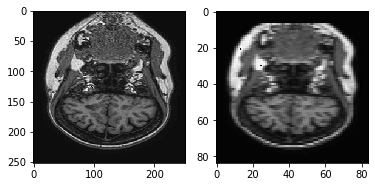

In [0]:
path="M_drive/My Drive/SeminarAMS/"
DATA_PATH=path+"/dataset_MRI_real/HR/"
images_path = os.listdir(DATA_PATH)
print(len(images_path))

DATA_PATH=path+"/dataset_MRI_real/LR_low/"
images_path = os.listdir(DATA_PATH)
print(len(images_path))

LR_DATA_PATH = path+"/dataset_MRI_real/LR_low/"
HR_DATA_PATH = path+"/dataset_MRI_real/HR/"


hr = itk.GetArrayFromImage(itk.ReadImage(join(HR_DATA_PATH, str(1250)+'.png')))
lr = itk.GetArrayFromImage(itk.ReadImage(join(LR_DATA_PATH, str(1250)+'.png')))
plt.figure()
plt.subplot(121)
plt.imshow(hr,cmap="gray")
plt.subplot(122)
plt.imshow(lr,cmap="gray")

# Shape all data into multidimensional array

In [0]:
from tqdm import tqdm
path="M_drive/My Drive/SeminarAMS/"
mri_data = []
LR_DATA_PATH = path+"/dataset_MRI_real/LR_low/"
HR_DATA_PATH = path+"/dataset_MRI_real/HR/"

lr_paths = os.listdir(LR_DATA_PATH)
for image_no in tqdm(range(len(lr_paths))):
    
    # read images
    hr = itk.ReadImage(join(HR_DATA_PATH, str(image_no)+'.png'))
    lr = itk.ReadImage(join(LR_DATA_PATH, str(image_no)+'.png'))

    mri_data.append({'hr':hr, 'lr':lr})

100%|██████████| 5107/5107 [02:27<00:00, 34.57it/s]


In [0]:
#join LR and HR images into 3D array
hr_array = np.dstack([np.squeeze(itk.GetArrayFromImage(data['hr'])) for data in mri_data])
lr_array = np.dstack([np.squeeze(itk.GetArrayFromImage(data['lr'])) for data in mri_data])
print('Velikost polja HR: {}'.format(hr_array.shape))
print('Velikost polja LR: {}'.format(lr_array.shape))

hr_array = np.transpose(hr_array, (2, 0, 1))
lr_array = np.transpose(lr_array, (2, 0, 1))
print('Velikost preoblikovanega polja HR: {}'.format(hr_array.shape))
print('Velikost preoblikovanega polja LR: {}'.format(lr_array.shape))

Velikost polja HR: (252, 252, 5107)
Velikost polja LR: (84, 84, 5107)
Velikost preoblikovanega polja HR: (5107, 252, 252)
Velikost preoblikovanega polja LR: (5107, 84, 84)


In [0]:
MODALITIES = ['hr', 'lr']

from keras import backend as K
print('Keras data format: {}'.format(K.image_data_format()))

# make data for training and validation
if K.image_data_format() == 'channels_first':
    hr_karray = hr_array[:, np.newaxis, :, :]
    lr_karray = lr_array[:, np.newaxis, :, :]
    channel_axis = 1
else:
    hr_karray = hr_array[:, :, :, np.newaxis]
    lr_karray = lr_array[:, :, :, np.newaxis]
    channel_axis = -1
print('Velikost polja HR slik {}'.format(hr_karray.shape))

    
print('Velikost polja LR slik {}'.format(lr_karray.shape))



Using TensorFlow backend.


Keras data format: channels_last
Velikost polja HR slik (5107, 252, 252, 1)
Velikost polja LR slik (5107, 84, 84, 1)


# Save already made arrays

In [0]:
path="M_drive/My Drive/SeminarAMS/"


save_dir=path+"/dataset_MRI_real/dataset/array_LR/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, lr_karray)
save_dir=path+"/dataset_MRI_real/dataset/array_HR/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, hr_karray)

# Load saved arrays

In [0]:
path="M_drive/My Drive/SeminarAMS/"
lr_karray=np.load(path+"dataset_MRI_real/dataset/lr_karray/.npy")
hr_karray=np.load(path+"dataset_MRI_real/dataset/.npy")
print(hr_karray.shape)

(10209, 252, 252, 1)


# Multiply image chanels

In [0]:
def multiply_dim(data,m,axis):
    '''
    Funkcija multiplicira željeno os v np.array

    Parameters
    ----------
    data : polje podatkov poljubne velikosti
    m : faktor množenja
    axis : številka osi ki jo želimo multiplicirati
    
    Returns
    --------
    odata : multiplicirani podatki

    '''
    
    odata=np.ndarray((data.shape[0],data.shape[1],data.shape[2],m))
    for i in range(m):
        odata[:,:,:,i]=np.squeeze(data,axis=axis)
    return odata

In [0]:
lr_data=multiply_dim(lr_karray,3,3)
hr_data=multiply_dim(hr_karray,3,3)
print(lr_data.shape)
print(hr_data.shape)

(5107, 84, 84, 3)
(5107, 252, 252, 3)


# Split data for training and validation

In [0]:
TEST_DATA_FRACTION = 0.2
X_train, X_test, y_train, y_test = train_test_split(lr_data[:5000,:,:,:], hr_data[:5000,:,:,:], test_size=TEST_DATA_FRACTION)

print('Velikost LR polja za učenje: {}'.format(X_train.shape))
print('Velikost LR polja za testiranje: {}'.format(X_test.shape))

print('Velikost HR polja za učenje: {}'.format(y_train.shape))
print('Velikost HR polja za testiranje: {}'.format(y_test.shape))

Velikost LR polja za učenje: (4000, 84, 84, 3)
Velikost LR polja za testiranje: (1000, 84, 84, 3)
Velikost HR polja za učenje: (4000, 252, 252, 3)
Velikost HR polja za testiranje: (1000, 252, 252, 3)


# Save training and validation data

In [0]:
path="M_drive/My Drive/SeminarAMS"


save_dir=path+"/dataset_MRI_real/dataset_split/X_train/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, X_train)

save_dir=path+"/dataset_MRI_real/dataset_split/X_test/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, X_test)

save_dir=path+"/dataset_MRI_real/dataset_split/y_train/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, y_train)

save_dir=path+"/dataset_MRI_real/dataset_split/y_test/"
os.makedirs(save_dir, exist_ok=True)
np.save(save_dir, y_test)